In [1]:
import pandas as pd

housing = pd.read_csv('zestawy danych/mieszkania_poland/Houses.csv', encoding='latin-1', index_col=0)

housing.head()

,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23764 entries, 0 to 23763
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    23764 non-null  object 
 1   city       23764 non-null  object 
 2   floor      23764 non-null  float64
 3   id         23764 non-null  float64
 4   latitude   23764 non-null  float64
 5   longitude  23764 non-null  float64
 6   price      23764 non-null  float64
 7   rooms      23764 non-null  float64
 8   sq         23764 non-null  float64
 9   year       23764 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.0+ MB


In [3]:
housing['address'].value_counts()

address
Mokotów                                    426
Wola                                       384
Nowe Miasto Malta ul. Katowicka            377
ródmiecie                                352
Bia³o³êka                                  248
                                          ... 
Mokotów Dolny Mokotów ul. Konstanciñska      1
Mokotów Sadyba Bernardyñska                  1
Podgórze P³aszów Wielicka                    1
Mokotów S³u¿ewiec Be³dan                     1
Bemowo ul. Antoniego Kocjana                 1
Name: count, Length: 5419, dtype: int64

In [4]:
summary = housing.describe()
summary.round(0)

,floor,id,latitude,longitude,price,rooms,sq,year
count,23764.0,23764.0,23764.0,23764.0,23764.0,23764.0,23764.0,23764.0
mean,3.0,15622.0,51.0,20.0,649354.0,3.0,103.0,2001.0
std,2.0,8617.0,1.0,1.0,532697.0,1.0,6534.0,48.0
min,0.0,1.0,50.0,4.0,5000.0,1.0,9.0,70.0
25%,1.0,8421.0,50.0,20.0,411546.0,2.0,42.0,1985.0
50%,2.0,15638.0,52.0,20.0,520000.0,3.0,54.0,2019.0
75%,4.0,23111.0,52.0,21.0,699999.0,3.0,69.0,2021.0
max,10.0,30308.0,54.0,30.0,15000000.0,10.0,1007185.0,2980.0


In [5]:
housing_max_price = housing['price'].idxmax()

In [6]:
address_with_max_price = housing.loc[housing_max_price, 'address']

In [7]:
print(address_with_max_price)

ródmiecie Z³ota


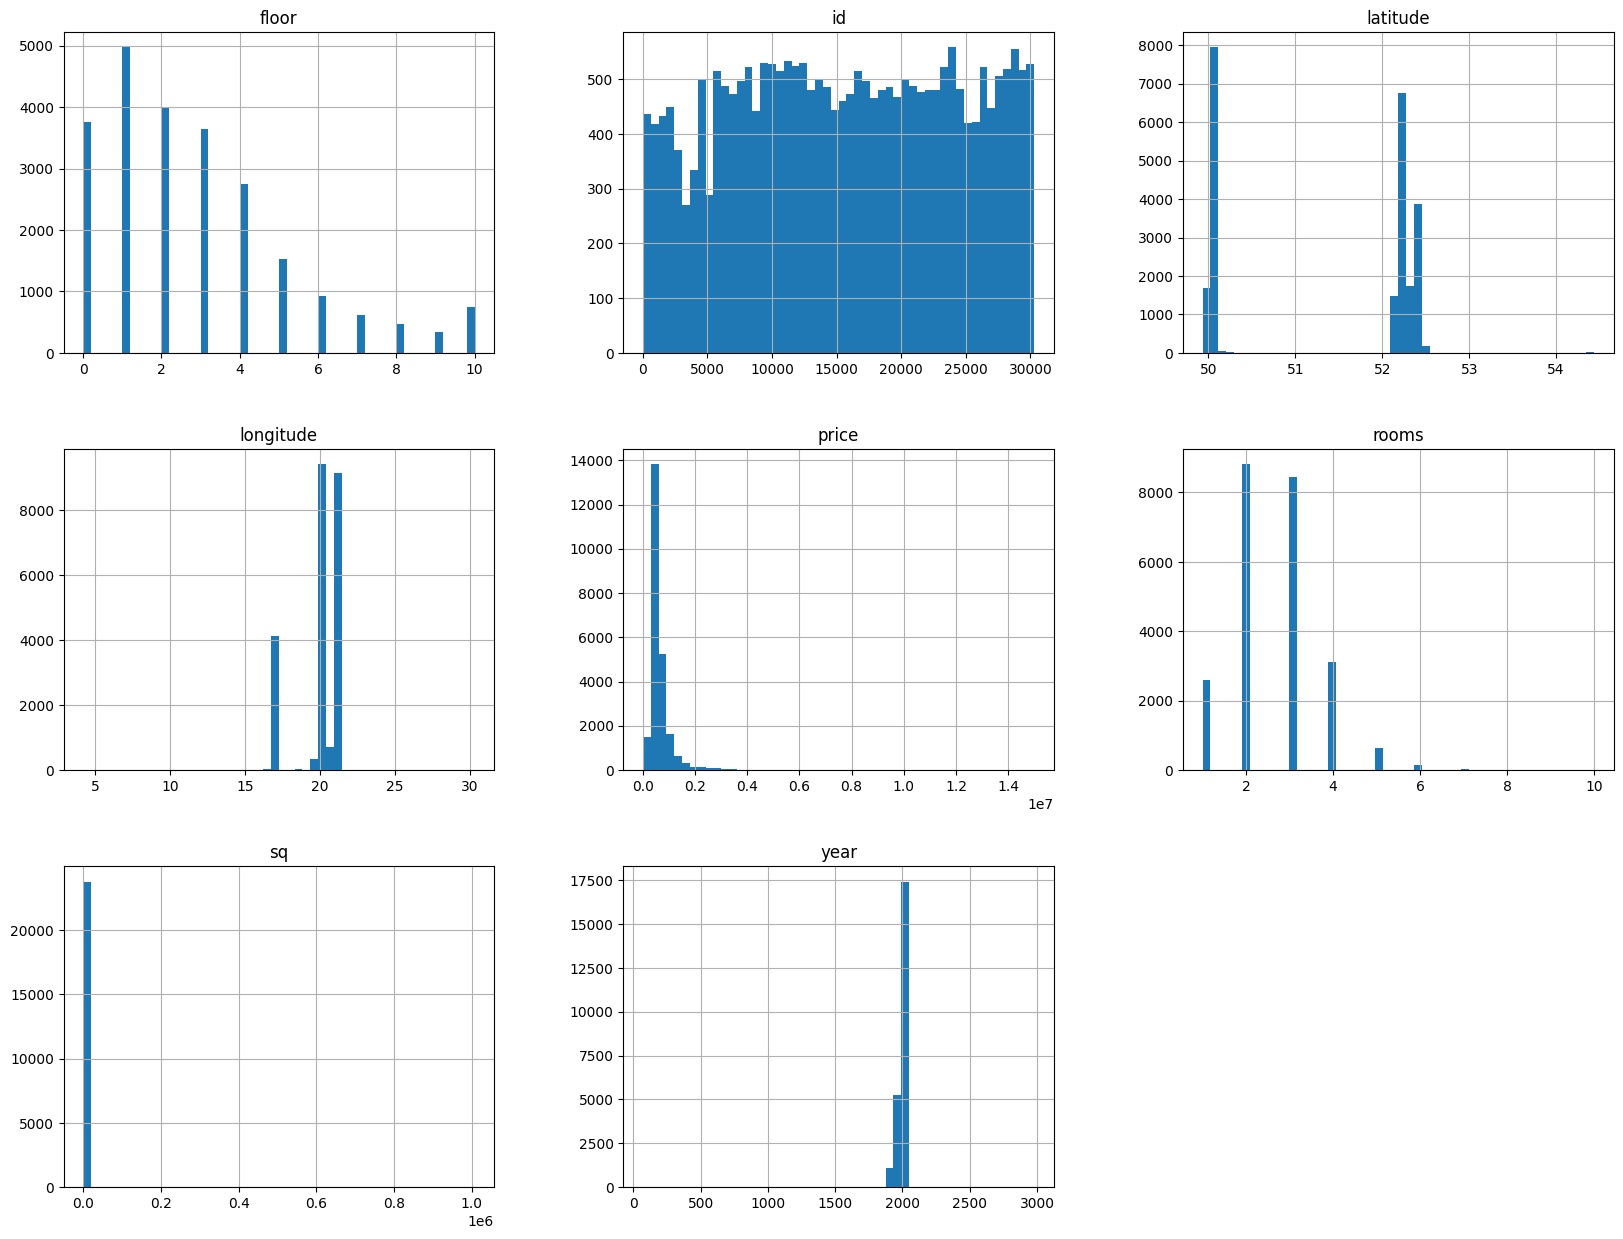

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

housing.hist(bins=50, figsize=(20, 15))
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [10]:
housing = strat_train_set.copy()

NameError: name 'strat_train_set' is not defined